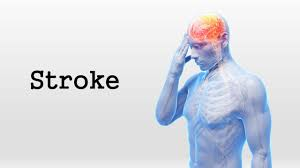

**A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Today we'll predict whether a person can have stroke**

# Please Upvote this kernel and if you find it helpful please keep it in your Favourite Section.







# OBJECTIVE
1. Exploratory Data Analysis
2. Stroke Prediction

In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


**Importing necessary Libraries**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import sklearn.metrics as mt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

**Importing data**

In [117]:
data=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [118]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Checking Null Values**

In [119]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [120]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Checking the Target Distribution**

Text(0.5, 1.0, 'Data distribution')

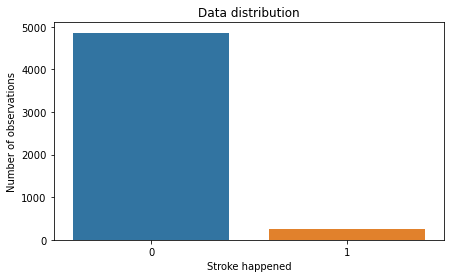

In [122]:
fig,n = plt.subplots(figsize=(7,4))
g=sns.barplot(x=data['stroke'].value_counts().index,y=data['stroke'].value_counts())
g.set_xlabel('Stroke happened')
g.set_ylabel('Number of observations')
g.set_title('Data distribution')

**Checking some plots for the Distribution of the Numerical features**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

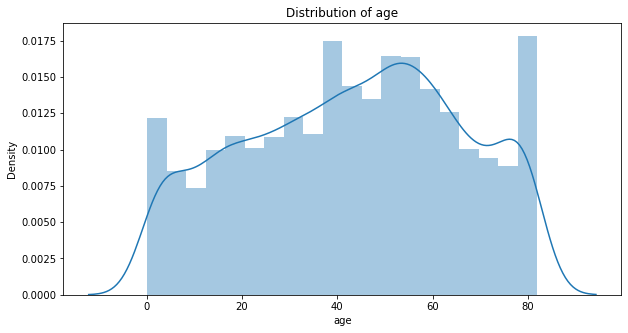

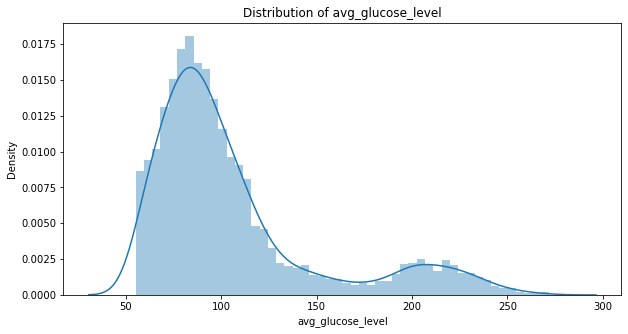

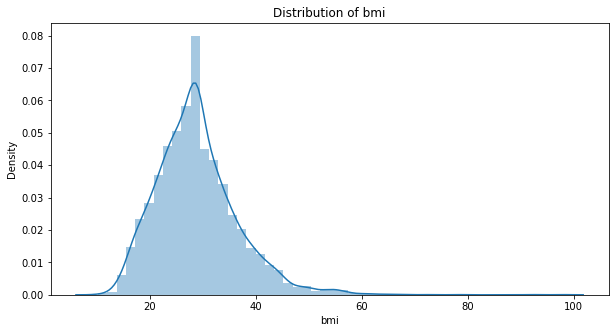

In [123]:
numerical=['age','avg_glucose_level','bmi']
for x in numerical:
    fig,n=plt.subplots(figsize=(10,5))
    g=sns.distplot(data[x])
    g.set_title(f'Distribution of {x}')
    

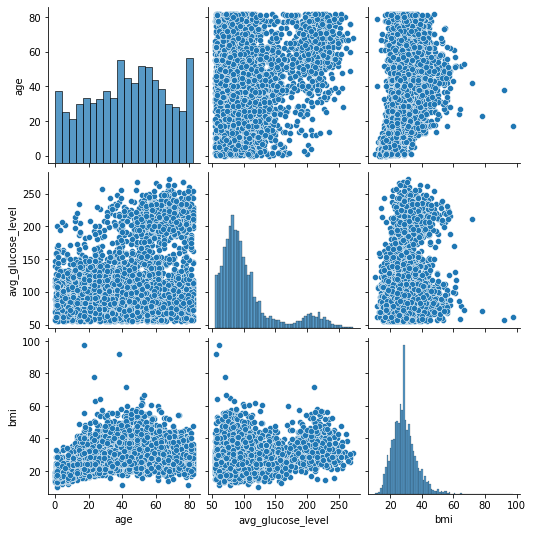

In [124]:
sns.pairplot(data[numerical])

<AxesSubplot:>

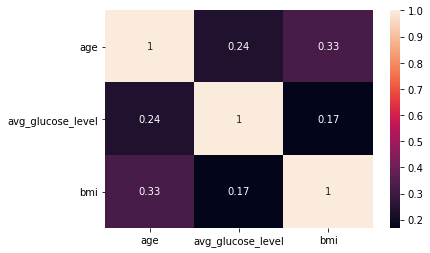

In [125]:
sns.heatmap(data[numerical].corr(),annot=True)

**Checking some plots for the Categorical features where Stroke Occured**

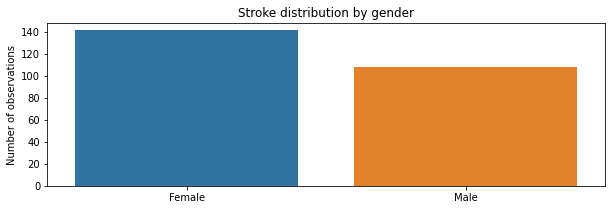

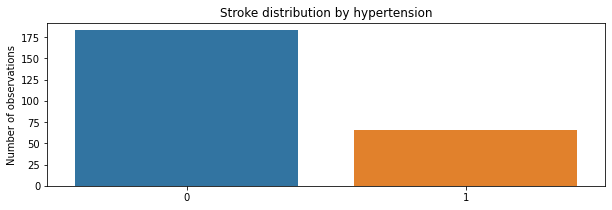

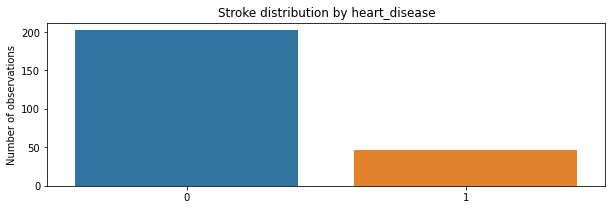

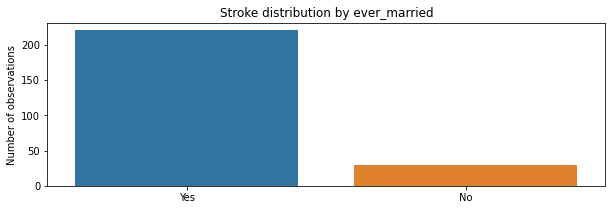

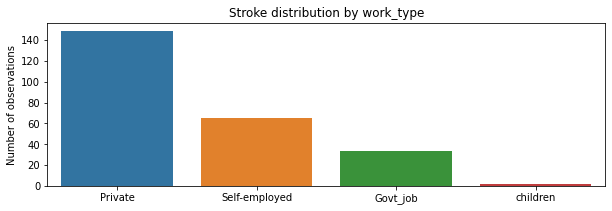

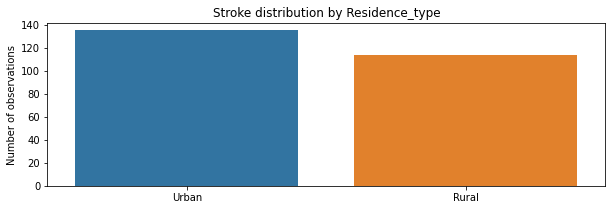

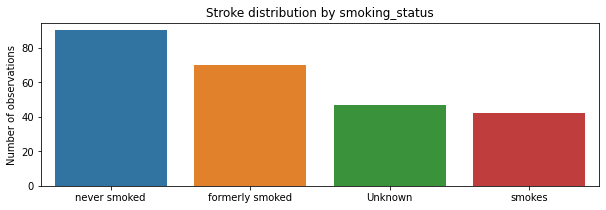

In [126]:
categorical=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for x in categorical:
    cat=data[data['stroke']==1][x]
    fig,n=plt.subplots(figsize=(10,3))
    g=sns.barplot(x=cat.value_counts().index,y=cat.value_counts())
    g.set_title(f'Stroke distribution by {x}')
    g.set_ylabel('Number of observations')
    

**LabelEncoding for the Object type features**

In [127]:
obtype=['gender','ever_married','work_type','Residence_type','smoking_status']
gen_encode=LabelEncoder()
mar_encode=LabelEncoder()
work_encode=LabelEncoder()
res_encode=LabelEncoder()
smo_encode=LabelEncoder()
data['gender']=gen_encode.fit_transform(data['gender'])
data['ever_married']=mar_encode.fit_transform(data['ever_married'])
data['work_type']=work_encode.fit_transform(data['work_type'])
data['Residence_type']=res_encode.fit_transform(data['Residence_type'])
data['smoking_status']=smo_encode.fit_transform(data['smoking_status'])

**Splitting dataset for Train and Test**

In [128]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [129]:
train=data.sample(frac=0.7,random_state=1)
test=data.loc[~data.id.isin(train.index)]

**Splitting Training dataset into Training and Validation**

In [130]:
X=train.iloc[:,1:-1]
y=train.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [131]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
836,0,51.0,0,0,0,2,1,110.76,24.7,1
3670,0,51.0,0,0,1,0,0,92.95,23.9,2
3443,1,58.0,0,0,1,2,1,94.53,36.1,2
724,1,70.0,0,0,1,2,1,64.41,29.4,3
3578,0,71.0,1,0,1,2,0,202.98,41.3,2
...,...,...,...,...,...,...,...,...,...,...
3983,0,51.0,0,0,1,2,1,95.70,24.8,1
1607,1,60.0,1,0,1,2,1,197.09,34.3,0
3026,1,40.0,1,0,1,2,1,90.91,39.1,0
1850,0,78.0,0,0,1,3,0,84.49,26.4,2


**Applying Cross Validations**

In [132]:
from sklearn.model_selection import cross_val_score
ran=RandomForestClassifier(n_estimators=100)
xgb=XGBClassifier()
score_ran=cross_val_score(ran,X,y,cv=10,scoring='f1').max()    
score_xgb=cross_val_score(xgb,X,y,cv=10,scoring='f1').max()


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [133]:
score_ran

0.09999999999999999

In [134]:
score_xgb

0.24

*Now we can see that XGBoost is giving better results for F1 score*

**Fitting with XGBoostClassifier**

In [135]:
xgb.fit(X_train,y_train)
pred=xgb.predict(test.iloc[:,1:-1])

[10:15:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [136]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
836,0,51.0,0,0,0,2,1,110.76,24.7,1
3670,0,51.0,0,0,1,0,0,92.95,23.9,2
3443,1,58.0,0,0,1,2,1,94.53,36.1,2
724,1,70.0,0,0,1,2,1,64.41,29.4,3
3578,0,71.0,1,0,1,2,0,202.98,41.3,2
...,...,...,...,...,...,...,...,...,...,...
3983,0,51.0,0,0,1,2,1,95.70,24.8,1
1607,1,60.0,1,0,1,2,1,197.09,34.3,0
3026,1,40.0,1,0,1,2,1,90.91,39.1,0
1850,0,78.0,0,0,1,3,0,84.49,26.4,2


**Using various metrics**

In [137]:
print(mt.classification_report(test.iloc[:,-1],pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4626
           1       0.77      0.53      0.63       231

    accuracy                           0.97      4857
   macro avg       0.87      0.76      0.80      4857
weighted avg       0.97      0.97      0.97      4857



In [138]:
print(mt.accuracy_score(test.iloc[:,-1],pred))

0.96994029236154


In [139]:
print(mt.precision_score(test.iloc[:,-1],pred))

0.7672955974842768


In [140]:
print(mt.recall_score(test.iloc[:,-1],pred))

0.5281385281385281


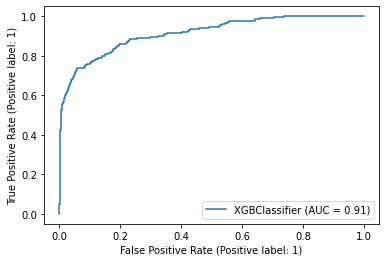

In [141]:
mt.plot_roc_curve(xgb,test.iloc[:,1:-1],test.iloc[:,-1])

**Finally storing the predicted values of the test data to csv**

In [142]:
test['predicted']=pred
final=test[['id','predicted']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
final.to_csv('test.csv')

In [150]:
xgb.save_model('0001.model')

In [155]:
def predict(model_link, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    # creating the pandas dataframe and replicating previous steps
    a_dict = {'gender': [gender], 'age': [age], 'hypertension': [hypertension], 'heart_disease': heart_disease, 
           'ever_married': [ever_married], 'work_type': [work_type], 'Residence_type': [Residence_type], 
           'avg_glucose_level': [avg_glucose_level], 'bmi': [bmi], 'smoking_status': [smoking_status]}
    data = pd.DataFrame(a_dict)
    data['gender'] = 1 if gender == 'male' else 0
    data['ever_married'] = 1 if ever_married == 'Yes' else 0
    work_mapping = {'Self_employed': 3,'Private' : 2, 'children' : 1, 'Govt_job': 0}
    data['work_type'] = data['work_type'].map(work_mapping)
    data['Residence_type'] = 1 if Residence_type == 'Urban' else 0
    smoke_mapping = {'Unknown': 0, 'formerly smoked': 1, 'never_smoked': 2, 'smokes': 3}
    data['smoking_status'] = data['smoking_status'].map(smoke_mapping)
    # after data has been replicated
    xgb = XGBClassifier()
    xgb.load_model(model_link)
    print(xgb.predict(data))

In [156]:
predict('0001.model', 'Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked')

[0]
